 **SE IMPORTAN LAS LIBRERIAS**

In [15]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import re

**ABRIMOS EL ARCHIVO**

In [16]:
r = open("OpenBCI-RAW-2023-04-21_10-42-47.txt","r")
raw_data = r.readlines()[2] # con f.read() leemos todo el contenido
r.close()


**SE CALCULA LA FRECUENCIA Y PERIODO DE MUESTREO**

In [17]:
f = re.findall("[0-9][0-9]\d", raw_data)[0] #sacamos la frecuencia
Fs = float(f) #frecuencia de muestreo
Ts=1/Fs # Determinar el periodo de muestreo


**SE RETIRAN LAS TRES PRIMERAS FILAS PARA LEER EL ARCHIVO CORRECTAMENTE**

In [18]:
bci = np.genfromtxt("OpenBCI-RAW-2023-04-21_10-42-47.txt", delimiter=",",skip_header = 5)
bci = np.transpose(bci[:,1:9])

**FILTRAMOS LAS SEÑALES OBTENIDAS**

In [23]:
def bpass_fil(data, lcut, hcut, fs, order=4):
    nyquist = 0.5 * fs
    l = lcut / nyquist
    h = hcut / nyquist
    b, a = sig.butter(order, [l, h], btype='band')
    filt_data = sig.filtfilt(b, a, data)
    return filt_data

s = 0.02235
bci = bci*s
m = np.zeros(bci.shape)
filt = np.zeros(bci.shape)

for i in range(bci.shape[0]):
    filt[i] = bci[i]
    filt[i] = bpass_fil(bci[i], 0.8, 48, Fs)
    m[i] = np.arange(0, len(bci[i]))*Ts 

**GRAFICAMOS LAS SEÑALES EEG DEL OPENBCI POR CADA CANAL**

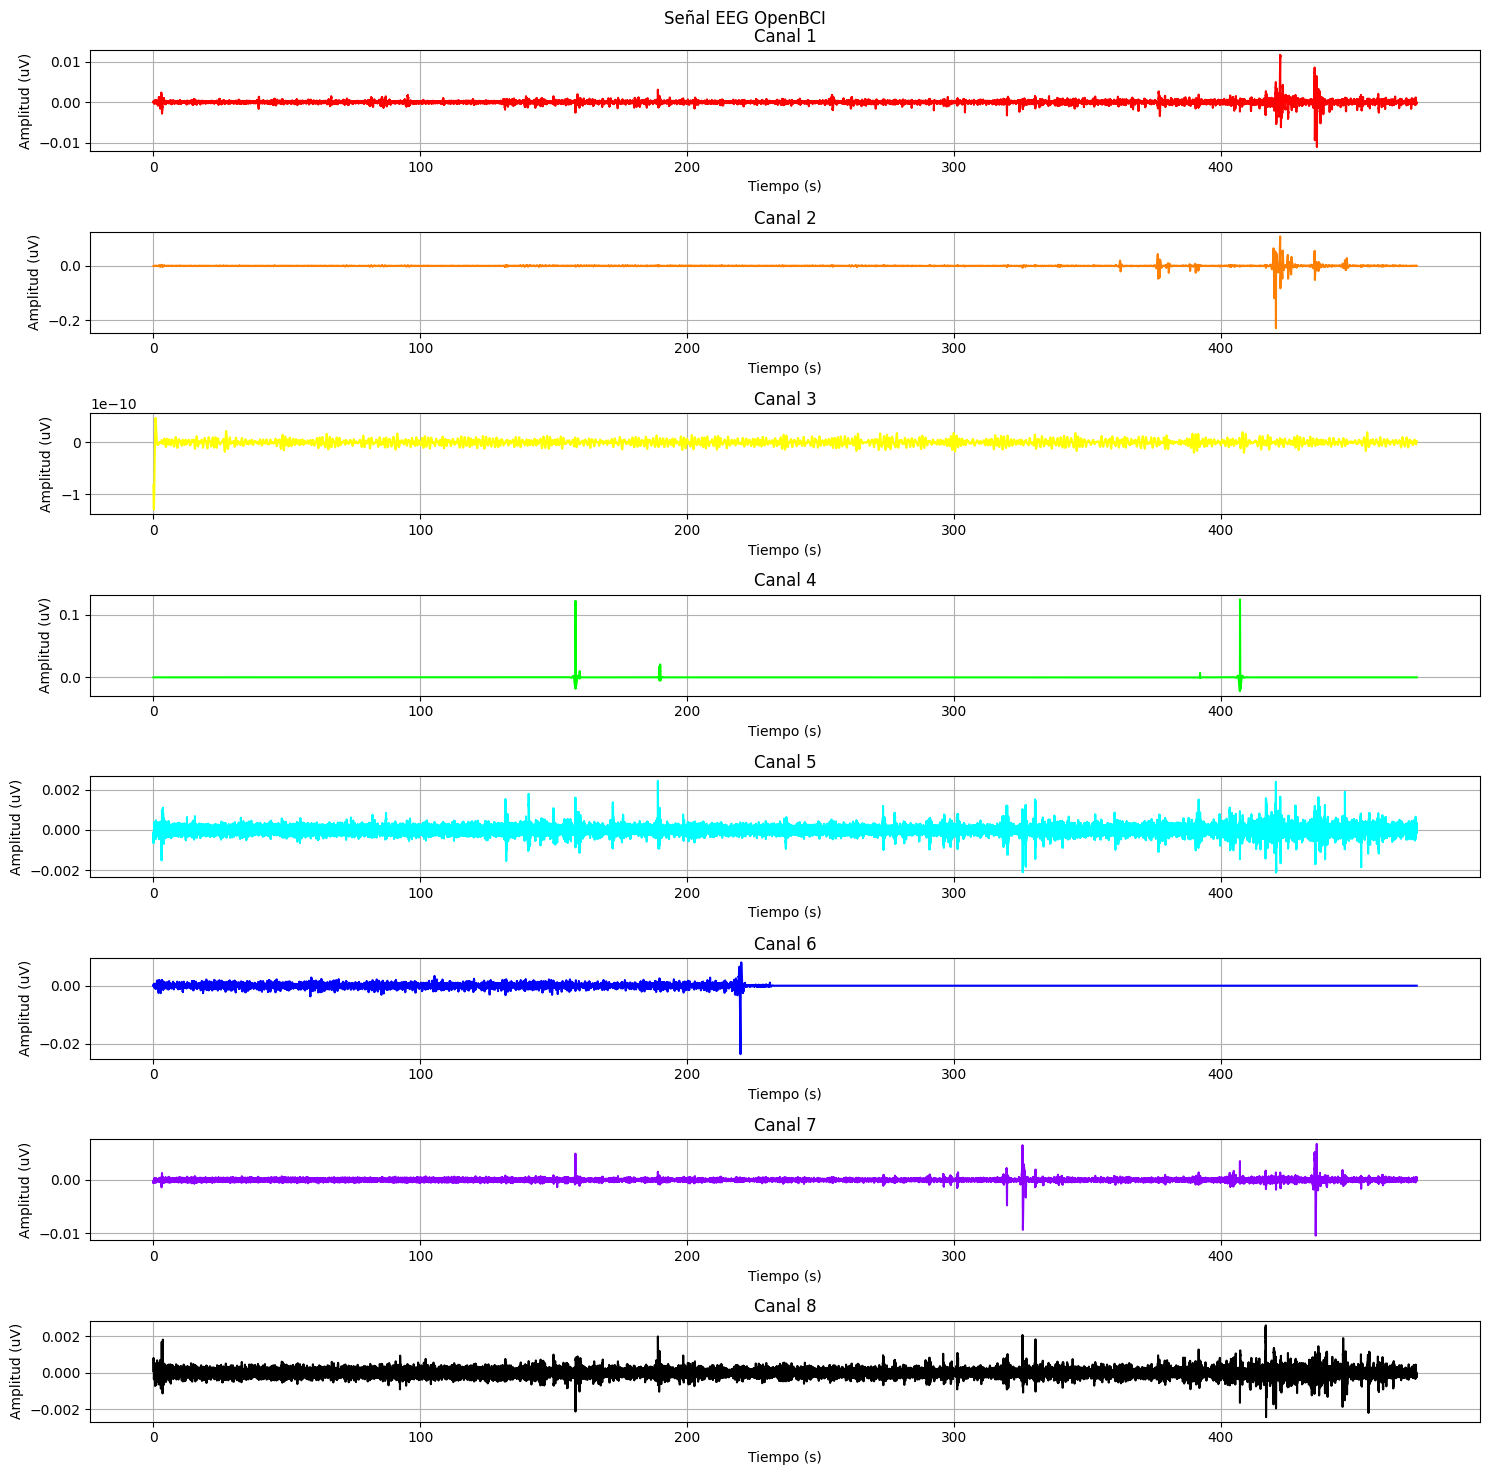

In [24]:


fig2 = plt.figure(figsize=(15,15))

colors = [ #Establecemos colores para diferenciar los canales
    "#ff0000", 
    "#ff7f00",  
    "#ffff00",  
    "#00ff00", 
    "#00ffff", 
    "#0000ff", 
    "#8b00ff",  
    "#000000" 
]

j = 8
fig2.suptitle('Señal EEG OpenBCI')

for i in range(j):
    plt.subplot(j, 1, i + 1); plt.plot(m[i], filt[i], color=colors[i]); plt.xlabel("Tiempo (s)")
    plt.title(f"Canal {i + 1}");plt.grid()
    plt.ylabel("Amplitud (uV)")
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('OPENBCI_.png', transparent=False, )
plt.show()